In [30]:
######################################################
# Ä°Åž PROBLEMÄ°
######################################################

In [31]:
# Facebook kÄ±sa sÃ¼re Ã¶nce mevcut "maximumbidding" adÄ± verilen teklif verme tÃ¼rÃ¼ne alternatif olarak yeni
# bir teklif tÃ¼rÃ¼ olan "average bidding"â€™i tanÄ±ttÄ±. MÃ¼ÅŸterilerimizden biri olan bombabomba.com, bu yeni Ã¶zelliÄŸi
# test etmeye karar verdi ve average bidding'in maximumbidding'den daha fazla dÃ¶nÃ¼ÅŸÃ¼m getirip getirmediÄŸini anlamak iÃ§in bir A/B testi yapmak istiyor.
# A/B testi 1 aydÄ±r devam ediyor ve bombabomba.com ÅŸimdi sizden bu A/B testinin sonuÃ§larÄ±nÄ± analiz etmenizi bekliyor.
# Bombabomba.com iÃ§in nihai baÅŸarÄ± Ã¶lÃ§Ã¼tÃ¼ Purchase'dÄ±r. Bu nedenle, istatistiksel testler iÃ§in Purchase metriÄŸine odaklanÄ±lmalÄ±dÄ±r.

In [32]:
#####################################################
# VERÄ° SETÄ° HÄ°KAYESÄ°
#####################################################

In [33]:
# Bir firmanÄ±n web sitesi bilgilerini iÃ§eren bu veri setinde kullanÄ±cÄ±larÄ±n gÃ¶rdÃ¼kleri ve tÄ±kladÄ±klarÄ±
# reklam sayÄ±larÄ± gibi bilgilerin yanÄ± sÄ±ra buradan gelen kazanÃ§ bilgileri yer almaktadÄ±r. Kontrol ve Test
# grubu olmak Ã¼zere iki ayrÄ± veri seti vardÄ±r. Bu veri setleri ab_testing.xlsx excelâ€™in ayrÄ± sayfalarÄ±nda yer
# almaktadÄ±r. Kontrol grubuna Maximum Bidding, test grubuna Average Bidding uygulanmÄ±ÅŸtÄ±r.

In [34]:
# impression: Reklam gÃ¶rÃ¼ntÃ¼leme sayÄ±sÄ±
# Click: GÃ¶rÃ¼ntÃ¼lenen reklama tÄ±klama sayÄ±sÄ±
# Purchase: TÄ±klanan reklamlar sonrasÄ± satÄ±n alÄ±nan Ã¼rÃ¼n sayÄ±sÄ±
# Earning: SatÄ±n alÄ±nan Ã¼rÃ¼nler sonrasÄ± elde edilen kazanÃ§

In [35]:
#####################################################
# PROJE GÃ–REVLERÄ°
#####################################################

In [36]:
#####################################################
# GÃ¶rev 1:  Veriyi HazÄ±rlama ve Analiz Etme
#####################################################

In [37]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind

In [38]:
pd.set_option("display.max_columns", None)      # TÃ¼m sÃ¼tunlarÄ±n gÃ¶zÃ¼kmesini saÄŸlar
pd.set_option("display.expand_frame_repr", False)      # Dataframe Ã§Ä±ktÄ±sÄ±nÄ±n tek satÄ±rda gÃ¶sterilmesi saÄŸlar
pd.set_option("display.float_format", lambda x: '%.5f' % x)    # OndalÄ±k sayÄ±larÄ± 5 basamaklÄ± ÅŸeklinde gÃ¶sterir

In [39]:
dataframe_control = pd.read_excel("/content/ab_testing.xlsx" , sheet_name="Control Group")
dataframe_test = pd.read_excel("/content/ab_testing.xlsx" , sheet_name="Test Group")

In [40]:
df_control = dataframe_control.copy()
df_test = dataframe_test.copy()

In [41]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [42]:
check_df(df_control)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0  82529.45927 6090.07732 665.21125 2311.27714
1  98050.45193 3382.86179 315.08489 1742.80686
2  82696.02355 4167.96575 458.08374 1797.82745
3 109914.40040 4910.88224 487.09077 1696.22918
4 108457.76263 5987.65581 441.03405 1543.72018
##################### Tail #####################
     Impression      Click  Purchase    Earning
35 132064.21900 3747.15754 551.07241 2256.97559
36  86409.94180 4608.25621 345.04603 1781.35769
37 123678.93423 3649.07379 476.16813 2187.72122
38 101997.49410 4736.35337 474.61354 2254.56383
39 121085.88122 4285.17861 590.40602 1289.30895
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

In [43]:
check_df(df_test)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
    Impression      Click  Purchase    Earning
0 120103.50380 3216.54796 702.16035 1939.61124
1 134775.94336 3635.08242 834.05429 2929.40582
2 107806.62079 3057.14356 422.93426 2526.24488
3 116445.27553 4650.47391 429.03353 2281.42857
4 145082.51684 5201.38772 749.86044 2781.69752
##################### Tail #####################
     Impression      Click  Purchase    Earning
35  79234.91193 6002.21358 382.04712 2277.86398
36 130702.23941 3626.32007 449.82459 2530.84133
37 116481.87337 4702.78247 472.45373 2597.91763
38  79033.83492 4495.42818 425.35910 2595.85788
39 102257.45409 4800.06832 521.31073 2967.51839
##################### NA #####################
Impression    0
Click         0
Purchase      0
Earning       0
dtype: int6

In [44]:
df_control["group"] = "control"
df_test["group"] = "test"

In [45]:
df = pd.concat([df_control, df_test], axis=0, ignore_index=False)   # axis=0 satÄ±ra gÃ¶re birleÅŸtirme
# ignore_index=False , kaldÄ±ÄŸÄ± yerden indekse devam et

In [46]:
df.head()

Impression      Click  Purchase    Earning    group
0  82529.45927 6090.07732 665.21125 2311.27714  control
1  98050.45193 3382.86179 315.08489 1742.80686  control
2  82696.02355 4167.96575 458.08374 1797.82745  control
3 109914.40040 4910.88224 487.09077 1696.22918  control
4 108457.76263 5987.65581 441.03405 1543.72018  control

In [47]:
df.tail()

Impression      Click  Purchase    Earning group
35  79234.91193 6002.21358 382.04712 2277.86398  test
36 130702.23941 3626.32007 449.82459 2530.84133  test
37 116481.87337 4702.78247 472.45373 2597.91763  test
38  79033.83492 4495.42818 425.35910 2595.85788  test
39 102257.45409 4800.06832 521.31073 2967.51839  test

/tmp/ipython-input-48-3835794550.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x="group", y="Purchase", ci=False, palette="pastel")
/tmp/ipython-input-48-3835794550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="group", y="Purchase", ci=False, palette="pastel")


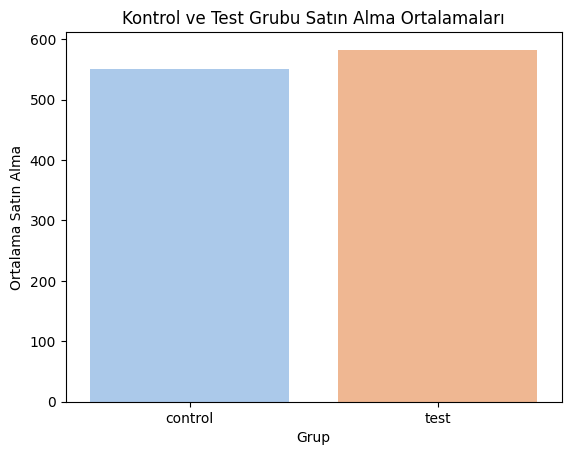

In [48]:
# GruplarÄ±n ortalama satÄ±n alma deÄŸerleri
sns.barplot(data=df, x="group", y="Purchase", ci=False, palette="pastel")
plt.title("Kontrol ve Test Grubu SatÄ±n Alma OrtalamalarÄ±")
plt.ylabel("Ortalama SatÄ±n Alma")
plt.xlabel("Grup")
plt.show()

/tmp/ipython-input-49-2341654451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="group", y="Purchase", palette="Set2")


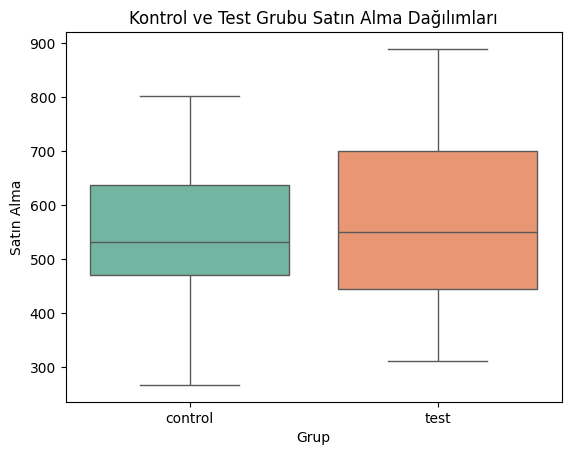

In [49]:
sns.boxplot(data=df, x="group", y="Purchase", palette="Set2")
plt.title("Kontrol ve Test Grubu SatÄ±n Alma DaÄŸÄ±lÄ±mlarÄ±")
plt.ylabel("SatÄ±n Alma")
plt.xlabel("Grup")
plt.show()

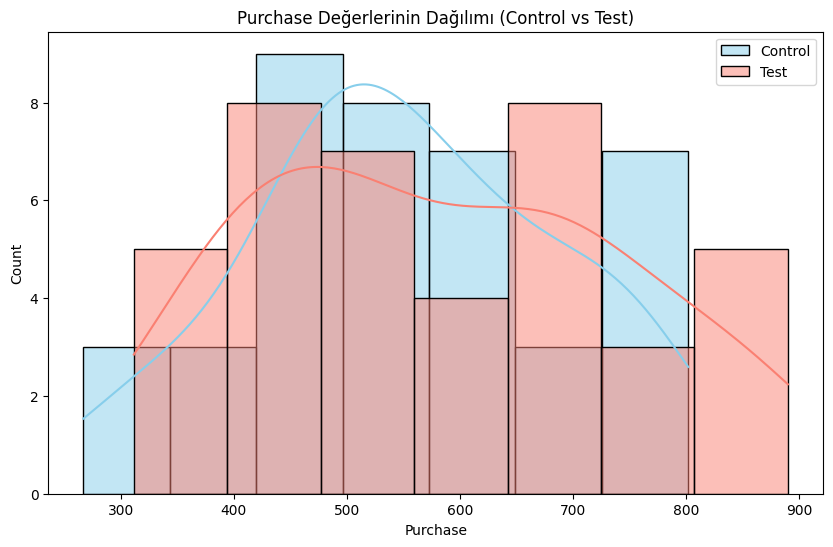

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["group"]=="control"]["Purchase"], label="Control", kde=True, color="skyblue")
sns.histplot(df[df["group"]=="test"]["Purchase"], label="Test", kde=True, color="salmon")
plt.title("Purchase DeÄŸerlerinin DaÄŸÄ±lÄ±mÄ± (Control vs Test)")
plt.xlabel("Purchase")
plt.legend()
plt.show()

In [51]:
#####################################################################
# GÃ¶rev 2 : A/B Testinin Hipotezinin TanÄ±mlanmasÄ±
#####################################################################

In [52]:
# H0 : M1 = M2 (Konrol grubu ve test grubu satÄ±n alma ortalamalarÄ± arasÄ±nda fark yoktur)
# H1 : M1 != M2 (Konrol grubu ve test grubu satÄ±n alma ortalamalarÄ± arasÄ±nda fark vardÄ±r)

In [53]:
df.groupby("group").agg({"Purchase": "mean"})

Purchase
group            
control 550.89406
test    582.10610

In [54]:
########################################################
# GÃ–REV 3: Hipotez Testinin GerÃ§ekleÅŸtirilmesi
########################################################

In [55]:
# Hipotez testi yapÄ±lmadan Ã¶nce varsayÄ±m kontrollerini yapalÄ±m. Bunlar Normallik VarsayÄ±mÄ± ve Varyans HomojenliÄŸidir.

In [56]:
# Normallik VarsayÄ±Ä±mÄ± :
# H0: Normal daÄŸÄ±lÄ±m varsayÄ±mÄ± saÄŸlanmaktadÄ±r.
# H1: Normal daÄŸÄ±lÄ±m varsayÄ±mÄ± saÄŸlanmamaktadÄ±r.
# p < 0.05 H0 RED
# P > 0.05 H0 REDDEDÄ°LEMEZ

In [57]:
test_stat, pvalue = shapiro(df.loc[df["group"] == "control", "Purchase"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [58]:
# H0 reddedilemez. Control grubunun deÄŸerleri normal daÄŸÄ±lÄ±m varsayÄ±mÄ± saÄŸlamaktadÄ±r

In [59]:
test_stat, pvalue = shapiro(df.loc[df["group"] == "test", "Purchase"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


In [60]:
# H0 reddedilemez. Test grubunun deÄŸerleri normal daÄŸÄ±lÄ±m varsayÄ±mÄ± saÄŸlamaktadÄ±r

In [61]:
# Varyans HomojenliÄŸi:
# H0 : Varyanslar homojendir
# H1 : Varyanslar homojen deÄŸildir
# p < 0.05 HO RED
# P > 0.05 H0 REDDEDÄ°LEMEZ

In [62]:
test_stat, pvalue = levene(df.loc[df["group"] == "control", "Purchase"],
                            df.loc[df["group"] == "test", "Purchase"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


In [63]:
# H0 reddedilemez. Control ve test grubunun deÄŸerleri varyans homojenliÄŸi varsayÄ±mÄ±nÄ± saÄŸlamaktadÄ±r.

In [64]:
# VarsayÄ±mlar gerÃ§ekleÅŸtiÄŸi iÃ§in baÄŸÄ±msÄ±z iki Ã¶rneklem t testi (parametrik test) yapÄ±lmaktadÄ±r.
# H0: M1 = M2 (Kontrol grubu ve test grubu satÄ±n alma ortalamalarÄ± arasÄ±nda istatistiksel olarak anlamlÄ± fark yoktur.)
# H0: M1 != M2 (Kontrol grubu ve test grubu satÄ±n alma ortalamalarÄ± arasÄ±nda istatistiksel olarak anlamlÄ± fark vardÄ±r.)
# p < 0.05 H0 RED , p > 0.05 H0 REDDEDÄ°LEMEZ

In [65]:
test_stat, pvalue = ttest_ind(df.loc[df["group"] == "control", "Purchase"],
                              df.loc[df["group"] == "test", "Purchase"],
                              equal_var =True)
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


In [66]:
# H0 REDDEDÄ°LEMEZ. Ä°ki grup arasÄ±nda anlamlÄ± bir farklÄ±lÄ±k yoktur.

In [67]:
########################################################
# GÃ–REV 4 : SonuÃ§larÄ±n Analizi
########################################################

ðŸ“Œ SONUÃ‡LAR VE Ã–NERÄ°LER

âœ… Analiz Ã–zeti

* Normallik varsayÄ±mÄ± her iki grup iÃ§in de saÄŸlanmÄ±ÅŸtÄ±r.

* Varyans homojenliÄŸi varsayÄ±mÄ± saÄŸlanmÄ±ÅŸtÄ±r.

* Uygulanan baÄŸÄ±msÄ±z iki Ã¶rneklem t-testi sonucunda:

  - p-value > 0.05 â†’ Hâ‚€ reddedilemez.

  - Yani, Average Bidding, Maximum Biddingâ€™e gÃ¶re istatistiksel olarak anlamlÄ± bir dÃ¶nÃ¼ÅŸÃ¼m farkÄ± yaratmamÄ±ÅŸtÄ±r.

* Her iki grubun Purchase (satÄ±n alma) ortalamalarÄ± birbirine oldukÃ§a yakÄ±ndÄ±r.

ðŸŽ¯ Ã–neriler

1. Average Bidding YÃ¶ntemi Hemen Uygulamaya AlÄ±nmamalÄ±dÄ±r

   - Analiz sonuÃ§larÄ±na gÃ¶re, Average Biddingâ€™in daha iyi performans gÃ¶sterdiÄŸine dair istatistiksel bir kanÄ±t bulunmamaktadÄ±r.

   - Bu nedenle reklam stratejisinin tamamen Average Biddingâ€™e geÃ§irilmesi Ã¶nerilmez.

2. Segment BazlÄ± Yeni A/B Testleri PlanlanmalÄ±dÄ±r

   - FarklÄ± kullanÄ±cÄ± segmentlerinde performans deÄŸiÅŸebilir.

   - Ã–zellikle ÅŸu segmentler bazÄ±nda yeniden test yapÄ±lmasÄ± Ã¶nerilir:

      * Yeni ve sadÄ±k kullanÄ±cÄ±lar

      * YaÅŸ gruplarÄ±

      * Mobil / desktop kullanÄ±cÄ±larÄ±

3. Ek BaÅŸarÄ± Metrikleri Dikkate AlÄ±nmalÄ±dÄ±r

   - Sadece satÄ±n alma (Purchase) deÄŸil;

      * Click-Through Rate (CTR)

      * Return on Ad Spend (ROAS)

      * Earning (Gelir) gibi metrikler de analiz edilmelidir.

  - Average Bidding belki daha az satÄ±ÅŸ getiriyor olabilir, ama daha dÃ¼ÅŸÃ¼k maliyetle daha kÃ¢rlÄ± olabilir.



âœ… Nihai Tavsiye

YapÄ±lan A/B testine gÃ¶re Average Bidding, Maximum Biddingâ€™e gÃ¶re istatistiksel olarak anlamlÄ± bir fark yaratmamÄ±ÅŸtÄ±r. Bu nedenle mevcut aÅŸamada tÃ¼m kampanyalarÄ±n yeni teklif yÃ¶ntemine geÃ§irilmesi Ã¶nerilmemektedir. Ancak daha fazla kullanÄ±cÄ± segmenti ve ek baÅŸarÄ± metrikleriyle yapÄ±lacak yeni analizler, karar sÃ¼recine daha fazla Ä±ÅŸÄ±k tutacaktÄ±r.
